# Data Visualization & Analysis

In [3]:
# Visualization & Analysis
# ---------------------------------------------

## Library
import pandas, datetime 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [4]:
## Load data
Question = pandas.read_sql('Question', "sqlite:///data/QAT_final.db", index_col='index')

In [5]:
## Apply functions - Convert date format

### Remove year, month, and day from dataframe. 
### Some of the function needs year, month, or day, so need to put a fake date (1/1/2011) into it
def oneDay(x):
    date = datetime.datetime.fromtimestamp(x['CreationDate_to_datetime'])
    return datetime.datetime(2011,1,1,date.hour,date.minute,date.second,date.microsecond)
### Same as above, but return a timestamp format 
def oneDay_timestamp(x):
    out = x['CreationDate_to_daytime']
    out = out.hour*60*60+out.minute*60+out.second
    return out
### Compute the respone time of the highest score answer. 
def RespTime(x):
    date = x['BestAnsTime'] - x['CreationDate_to_datetime']
    date = datetime.datetime.utcfromtimestamp(date)
    return datetime.datetime(date.year, date.month, date.day, date.hour, date.minute, date.second,date.microsecond)
### Same as above, but return a timestamp format 
def RespTime_timestamp(x):
    return x['BestAnsTime']-x['CreationDate_to_datetime']


In [6]:
## Updata / create values 
Question['CreationDate_to_daytime'] = Question.apply(oneDay, axis=1)
Question['CreationDate_to_daytime_timestamp'] = Question.apply(oneDay_timestamp, axis=1)
Question['BestAns_RespTime_timestamp'] = Question.apply(RespTime_timestamp, axis=1)
## Remove outliers, which are the data with some error
## Should execute this before applying RespTime()
Question_no_outlier = Question[Question['BestAns_RespTime_timestamp'] >= 0]

Question_no_outlier['BestAns_RespTime'] = Question_no_outlier.apply(RespTime, axis=1)

## Store dataframe
Question_no_outlier.to_sql('Question_no_outlier', "sqlite:///QAT_final.db", if_exists='replace')

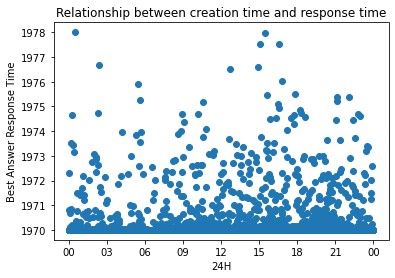

In [5]:
## Visualization
### Relationship between creation time and response time
fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
ax.yaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.plot_date(Question_no_outlier['CreationDate_to_daytime'][:5000],Question_no_outlier['BestAns_RespTime'][:5000])
plt.xlabel("24H")
plt.ylabel("Best Answer Response Time")
plt.title("Relationship between creation time and response time")
plt.show()
# ---------------------------------------------
# Data with outlier
# plt.plot_date(Question['CreationDate_to_daytime'][:1000],Question['BestAns_RespTime_timestamp'][:1000])
# plt.show()
# ---------------------------------------------

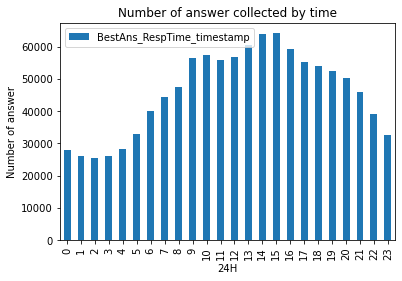

In [7]:
### Number of best answer collected by time
one_day = 60*60*24
one_bin = 60*60
bins = list(range(0,one_day+one_bin,one_bin))
hours = list(range(0,24,1))

### Binning the data
Question_no_outlier['CreationDate_to_daytime_bin'] = pandas.cut(Question_no_outlier['CreationDate_to_daytime_timestamp'], bins=bins, labels=hours)
hist = Question_no_outlier[['CreationDate_to_daytime_bin','BestAns_RespTime_timestamp']].groupby('CreationDate_to_daytime_bin').count()
hist.plot(kind='bar')
plt.xlabel("24H")
plt.ylabel("Number of answer")
plt.title("Number of answer collected by time")

plt.show()

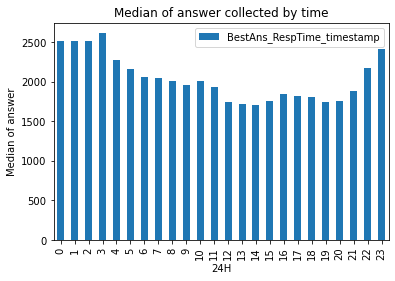

In [8]:
### Median of answer collected by time
hist = Question_no_outlier[['CreationDate_to_daytime_bin','BestAns_RespTime_timestamp']].groupby('CreationDate_to_daytime_bin').median()
hist.plot(kind='bar')
plt.xlabel("24H")
plt.ylabel("Median of answer")
plt.title("Median of answer collected by time")
plt.show()

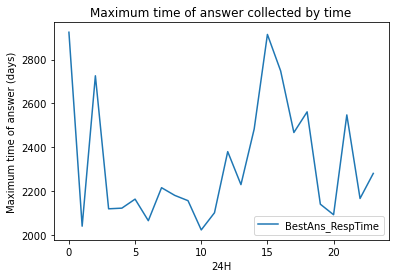

In [45]:
### Maximum time of best answer collected by time

hist = Question_no_outlier[['CreationDate_to_daytime_bin','BestAns_RespTime']].groupby('CreationDate_to_daytime_bin').max()
hist["BestAns_RespTime"] = (hist["BestAns_RespTime"]-datetime.datetime.utcfromtimestamp(0)).dt.days
ax = hist.plot()
plt.xlabel("24H")
plt.ylabel("Maximum time of answer (days)")
plt.title("Maximum time of answer collected by time")
plt.show()
